In [1]:
%matplotlib inline
import numpy as np
import scqubits as scq

# Bifluxon qubit

[1] Kalashnikov et al., PRX Quantum 1, 010307 (2020). https://doi.org/10.1103/PRXQuantum.1.010307

Bifluxon qubit based Eq. (1) in [1] with EJ disorder in the small Josephson junctions included,


$ H = 4E_{\text{C}}(-i\partial_\theta-n_g)^2-2E_\text{J}\left[\cos\theta\cos(\phi/2) + dE_J\sin\theta\sin(\phi/2)\right]  -4E_\text{CL}\partial_\phi^2+\frac{1}{2}E_L(\phi -\varphi_\text{ext})^2 $


In [7]:
bifluxon = scq.Bifluxon.create()

Output()

In [8]:
phi_grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200)

In [9]:
dEJ = (6)/(2*27.2)
print ("Disorder quoted in [1]:", dEJ)

Disorder quoted in [1]: 0.11029411764705882


# Soft Bifluxon

Same parameters as in Misha paper. 

In [43]:
bifluxon = scq.Bifluxon(grid = phi_grid,
                           EJ   = 27.2,
                           EL   =  0.94,
                           ECL  = 10.0,
                           EC   = 7.7,
                           dEJ = 0.11029411764705882,
                           ng   = 0.5,
                           flux = 0.5,
                           ncut = 30)

fs= bifluxon.eigenvals(evals_count=12)

## Spectrum vs gate charge at zero flux

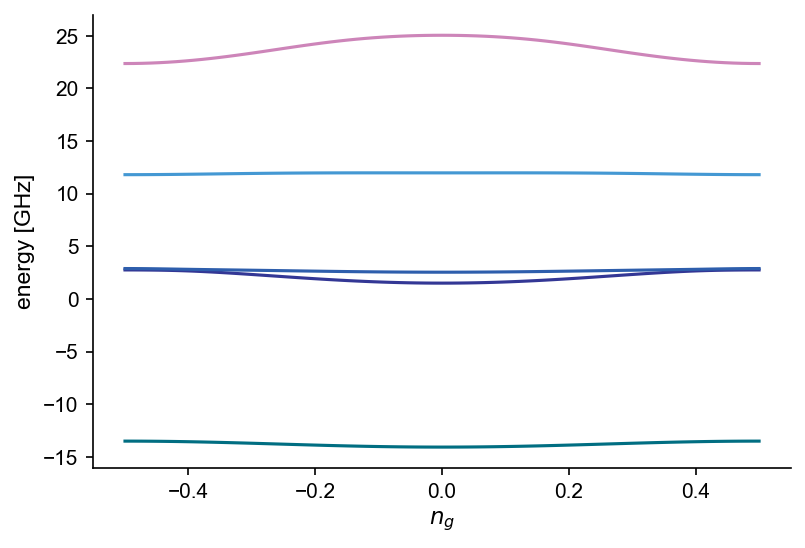

In [44]:
ng_list = np.linspace(-0.5, 0.5, 75)
bifluxon.flux = 0.0
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

## Spectrum vs gate charge at half flux flux

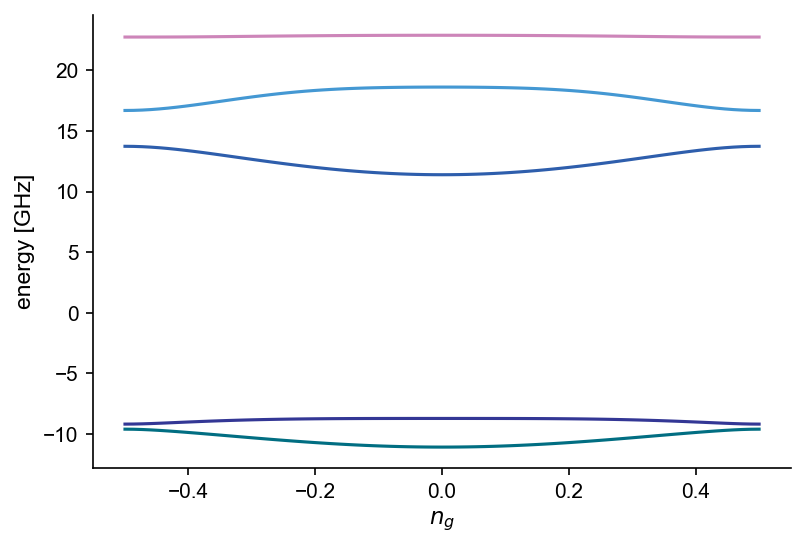

In [45]:
ng_list = np.linspace(-0.5, 0.5, 75)
bifluxon.flux = 0.5
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

## Spectrum vs flux at $n_g = 0.5$

In [14]:
bifluxon = scq.Bifluxon(grid = phi_grid,
                           EJ   = 27.2,
                           EL   =  0.94,
                           ECL  = 10.0,
                           EC   = 7.7,
                           dEJ = 0.11029411764705882,
                           ng   = 0.5,
                           flux = 0.23,
                           ncut = 30)

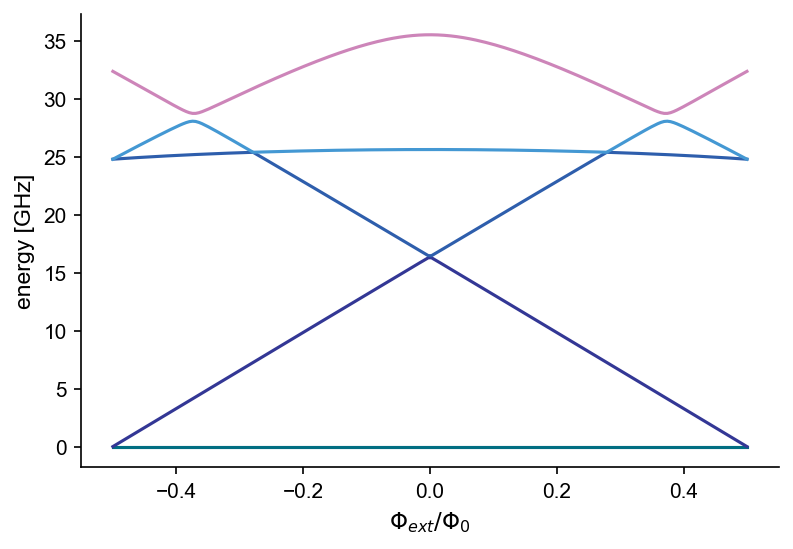

In [46]:
flux_list = np.linspace(-0.5, 0.5, 200)
bifluxon.ng = 0.5
bifluxon.dEJ = 0.0
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True);


## Splitting due to double phase slips - with Ej disorder

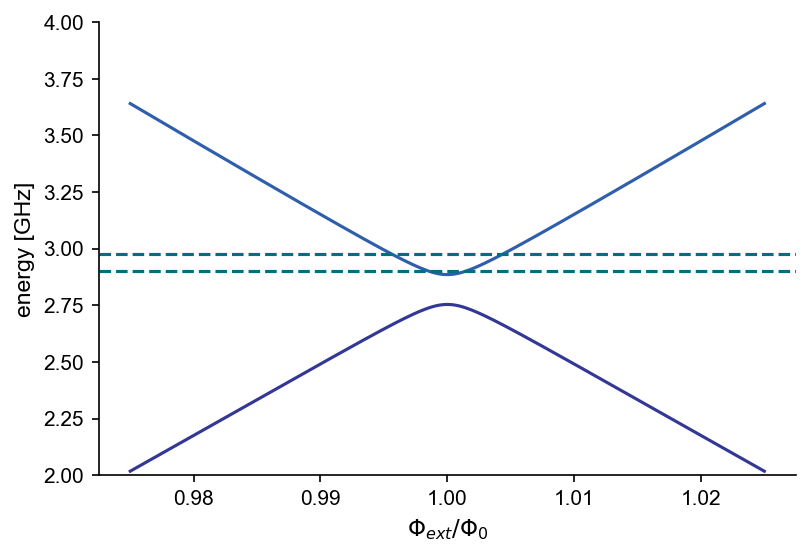

In [29]:
flux_list = np.linspace(0.975,1.025, 200)
bifluxon.ng = 0.5
bifluxon.dEJ = 0.11029411764705882
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False,ylim=[2,4]);
ax.axhline(2.9,ls='dashed')
ax.axhline(2.975,ls = 'dashed')

In [4]:
bifluxon.supported_noise_channels()

['tphi_1_over_f_flux', 'tphi_1_over_f_ng']

In [107]:
def splitting(EJ,ECL):
    beta = np.sqrt(2*EJ/ECL)
    return np.sqrt(8*EJ*ECL)*np.exp(-beta*np.pi**2)

def beta(EJ,ECL):
    beta = np.sqrt(2*EJ/ECL)
    return beta

def plasma_nu(EJ,ECL):
    return np.sqrt(8*EJ*ECL)

print ("Plasma frequency = ",plasma_nu(27.2,10.0),"GHz")
print ("Splitting =",splitting(27.2,10.0)*1e9,"Hz")

Plasma frequency =  46.647615158762406 GHz
Splitting = 4.693658054289353 Hz


## No spitting due to single phase slips

### With no Ej disorder

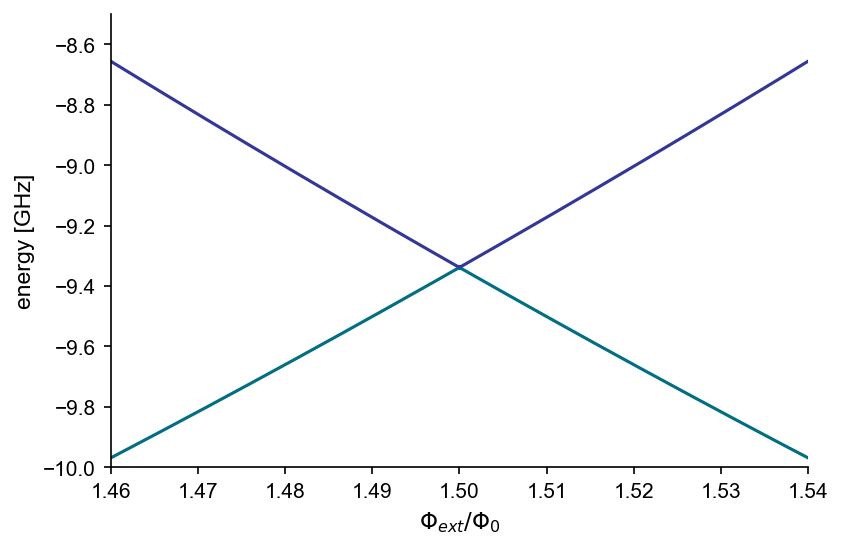

In [74]:
flux_list = np.linspace(1.45, 1.55, 250)
bifluxon.ng = 0.5
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False,ylim=[-10,-8.5],xlim = [1.46,1.54]);


### With Ej disorder

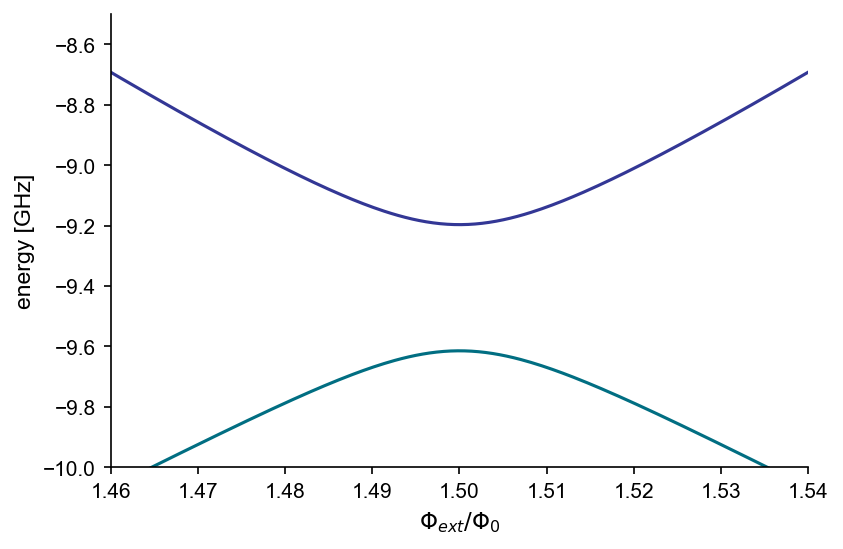

In [30]:
flux_list = np.linspace(1.45, 1.55, 250)
bifluxon.ng = 0.5
bifluxon.dEJ = 0.11029411764705882
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False,ylim=[-10,-8.5],xlim = [1.46,1.54]);


Above seems consistent with Fig 3(b) of paper

## Comparison with with Fig 4 of [1]

### ng = 0.5, dEJ = 0.11

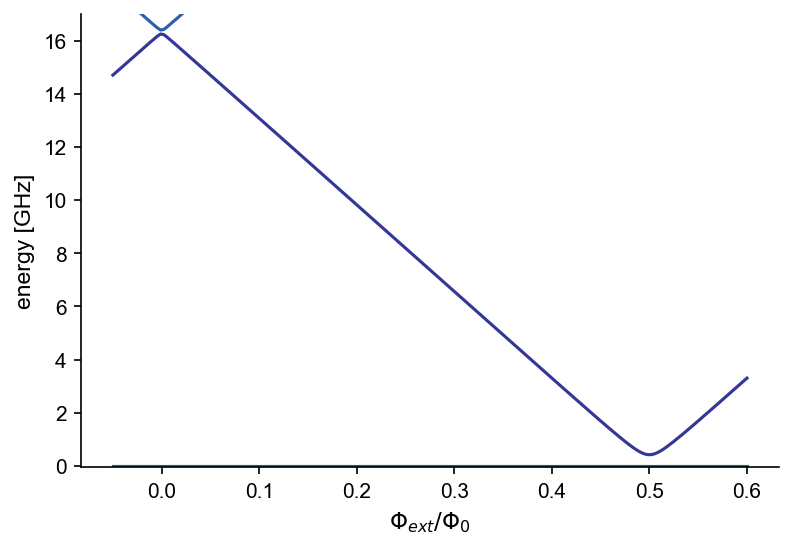

In [32]:
flux_list = np.linspace(-0.05, 0.6, 200)
bifluxon.ng = 0.5
bifluxon.dEJ = 0.11029411764705882
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True,ylim=[-0.05,17]);

### ng = 0.0, dEJ = 0.11

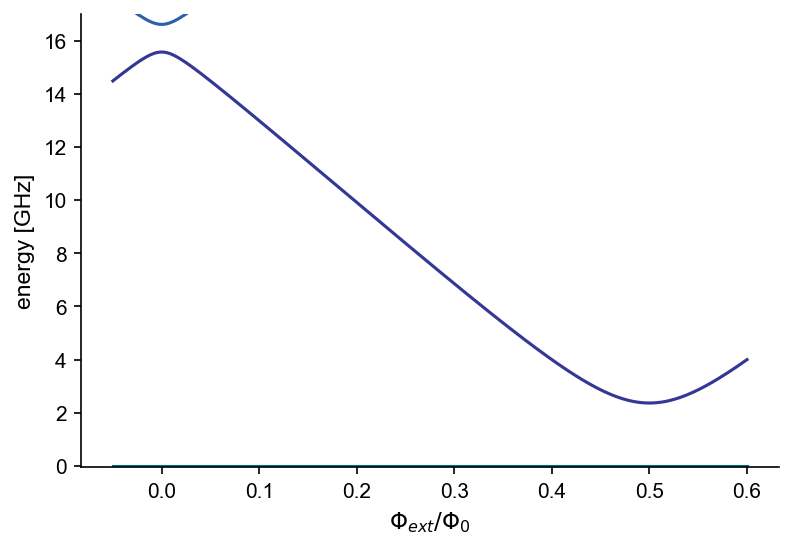

In [34]:
flux_list = np.linspace(-0.05, 0.6, 200)
bifluxon.ng = 0.0
bifluxon.dEJ = 0.11029411764705882
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True,ylim=[-0.05,17]);

### Add EJ disorder

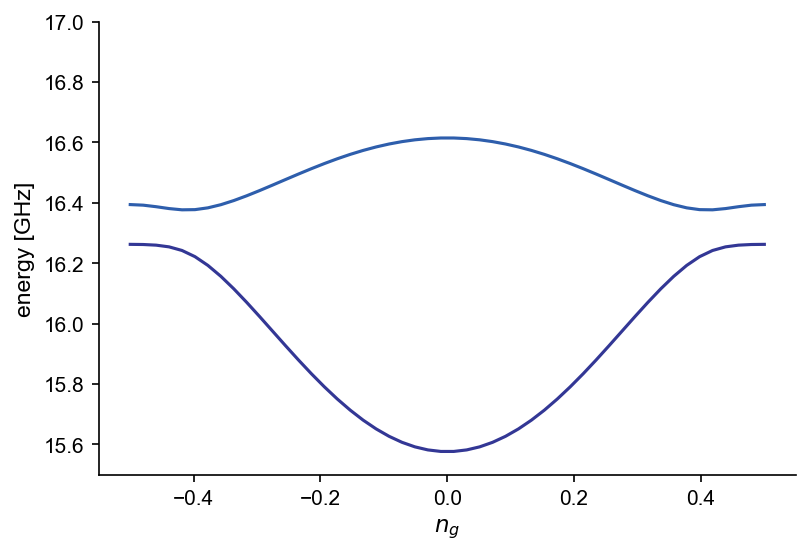

In [12]:
ng_list = np.linspace(-0.5, 0.5, 50)
bifluxon.flux = 0.0
bifluxon.dEJ = 0.11029411764705882
fig,ax = bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=True,ylim=[15.5,17]);

The above matches with Fig. 4(b) of [1]

# Bifluxon potential

$ U = -2E_\text{J}\left[\cos\theta\cos(\phi/2) + dE_J\sin\theta\sin(\phi/2)\right]   +\frac{1}{2}E_L(\phi)^2 $

Flux put into the junction rather than the inductor

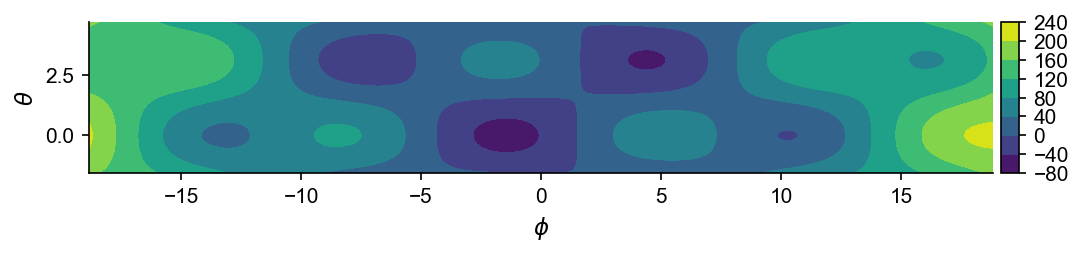

In [27]:
theta_grid = scq.Grid1d(-np.pi/2.0, 3*np.pi/2.0, 200)
bifluxon.dEJ = 0.0
bifluxon.plot_potential(theta_grid = theta_grid);

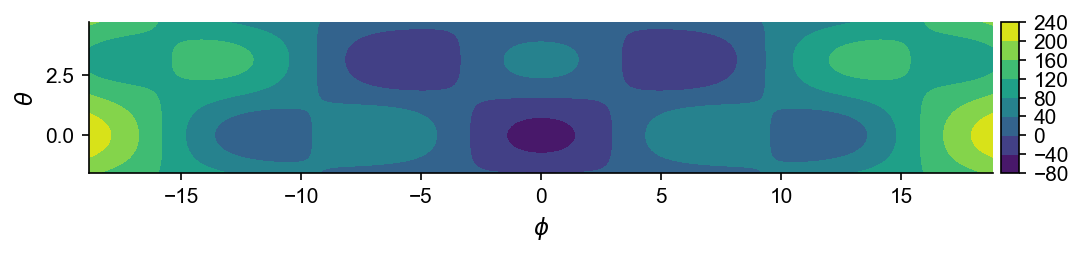

In [28]:
theta_grid = scq.Grid1d(-np.pi/2.0, 3*np.pi/2.0, 200)
bifluxon.dEJ = 0.0
bifluxon.flux= 0
bifluxon.plot_potential(theta_grid = theta_grid);

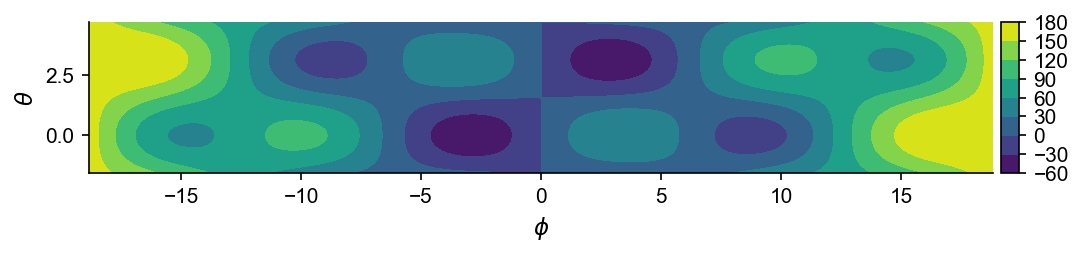

In [29]:
theta_grid = scq.Grid1d(-np.pi/2.0, 3*np.pi/2.0, 200)
bifluxon.dEJ = 0.0
bifluxon.flux= 0.5
bifluxon.plot_potential(theta_grid = theta_grid);

## dEJ = 0.11

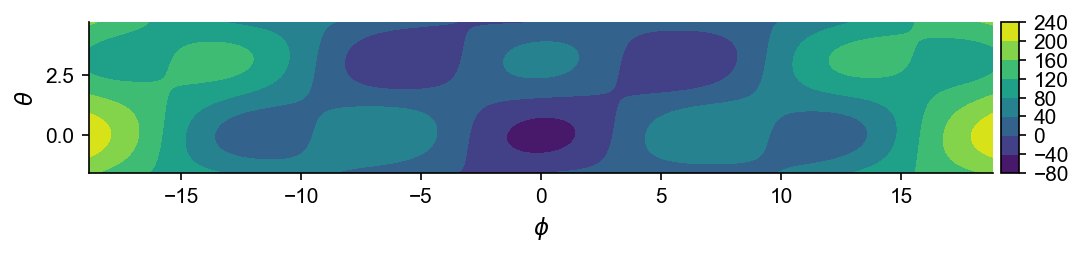

In [16]:
theta_grid = scq.Grid1d(-np.pi/2.0, 3*np.pi/2.0, 200)
bifluxon.dEJ = 0.11
bifluxon.plot_potential(theta_grid = theta_grid);

# Wavefunctions 

## at $n_g,\phi_{ext} = 0.5$

### $dEJ = 0$

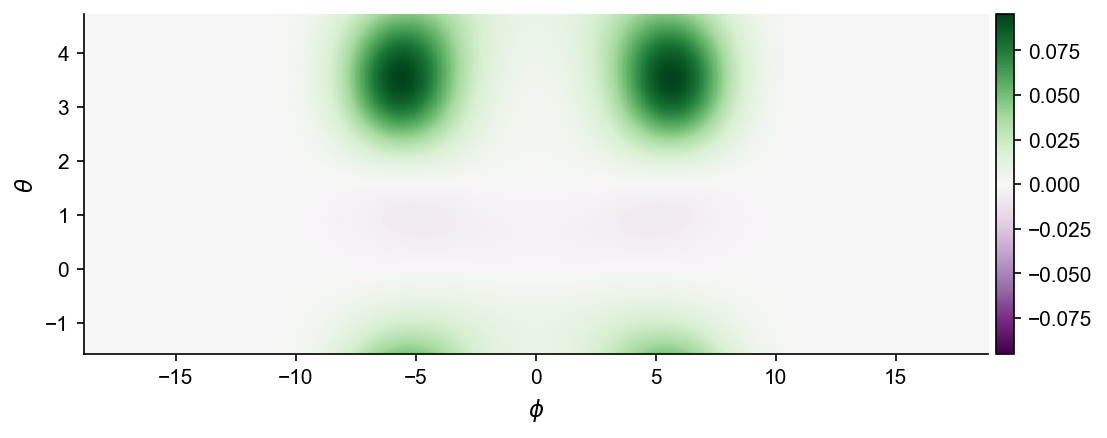

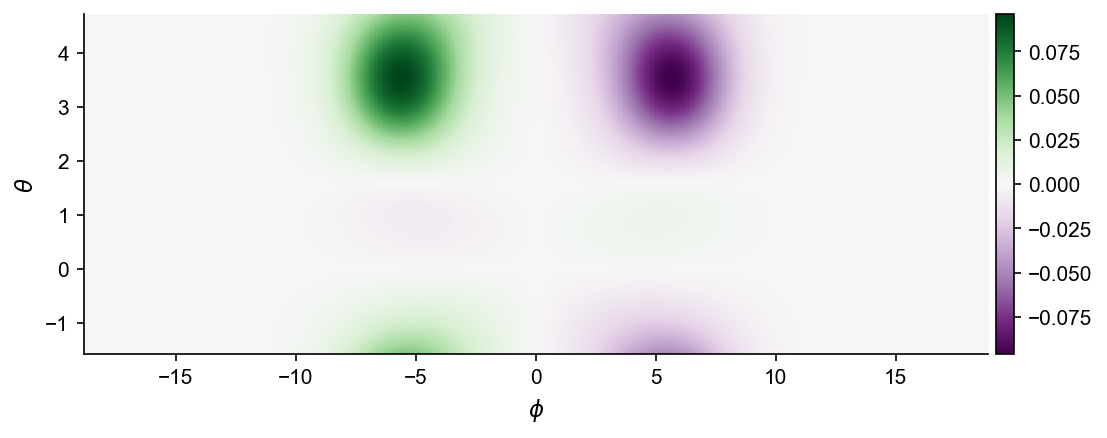

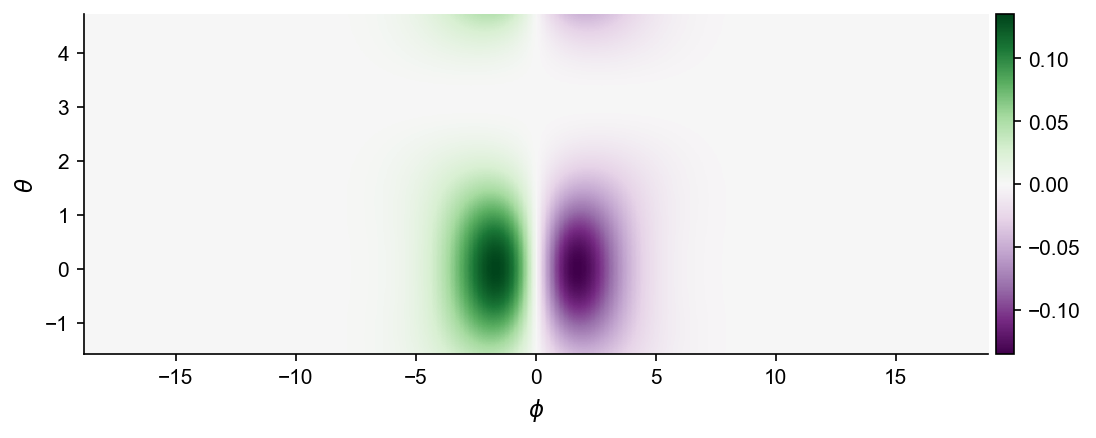

In [17]:
bifluxon.flux = 0.0
bifluxon.ng = 0.5
bifluxon.dEJ = 0.0 

fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=0, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=1, mode='real', zero_calibrate=True);
fig, ax = bifluxon.plot_wavefunction(theta_grid = theta_grid,which=2, mode='real', zero_calibrate=True);

# Noise modelling: soft bifluxon

In [16]:
bifluxon.supported_noise_channels()

['tphi_1_over_f_flux', 'tphi_1_over_f_ng', 't1_capacitive', 't1_inductive']

In [17]:
bifluxon.tphi_1_over_f_flux()

557.6525361638003

In [22]:
print (bifluxon.t1_inductive())

1005450.1562162524


In [19]:
bifluxon.ng=0.25
bifluxon.tphi_1_over_f_ng()

78.06403211964204

## vs ng @ $\Phi = 0.5$

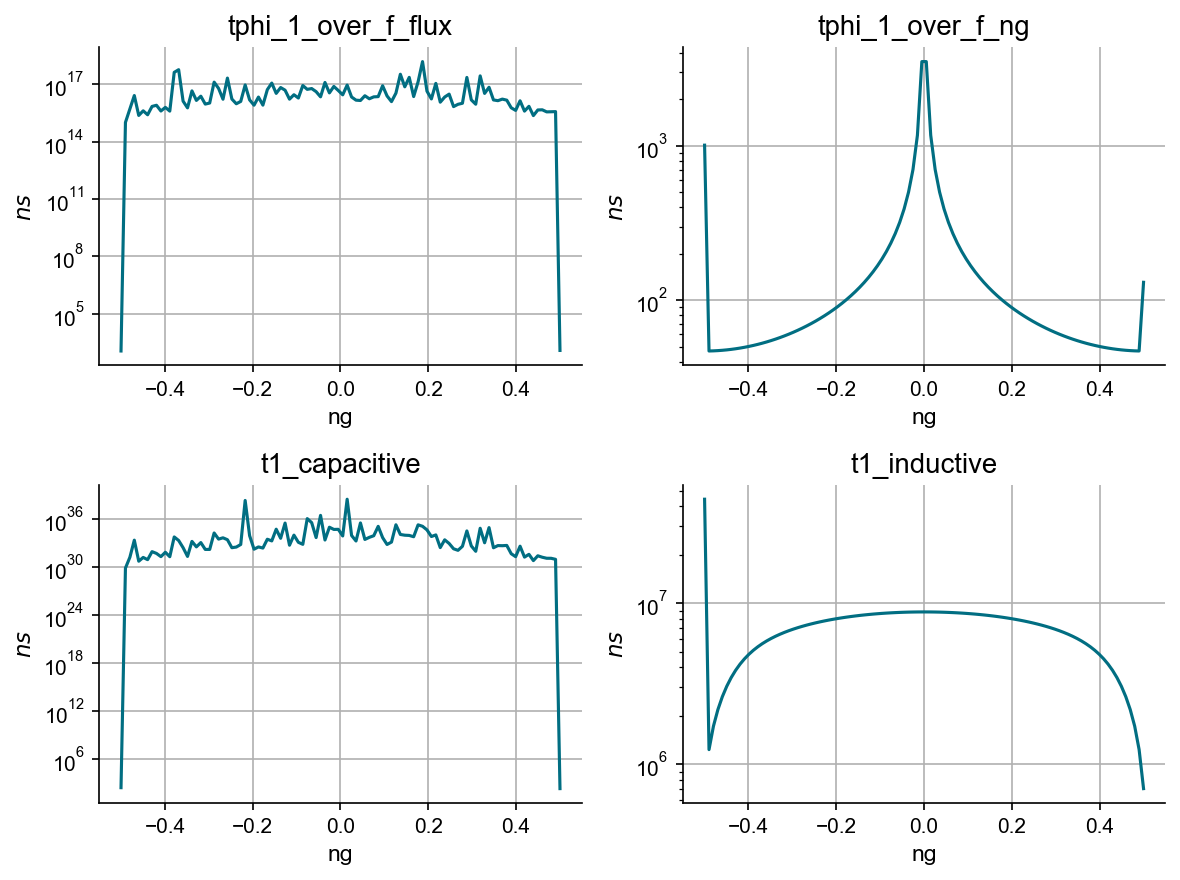

In [20]:
ng_list = np.linspace(-0.5,0.5,100)
bifluxon.flux=0.5
fig,ax = bifluxon.plot_coherence_vs_paramvals('ng', ng_list)

## vs ng @ $\Phi = 0$

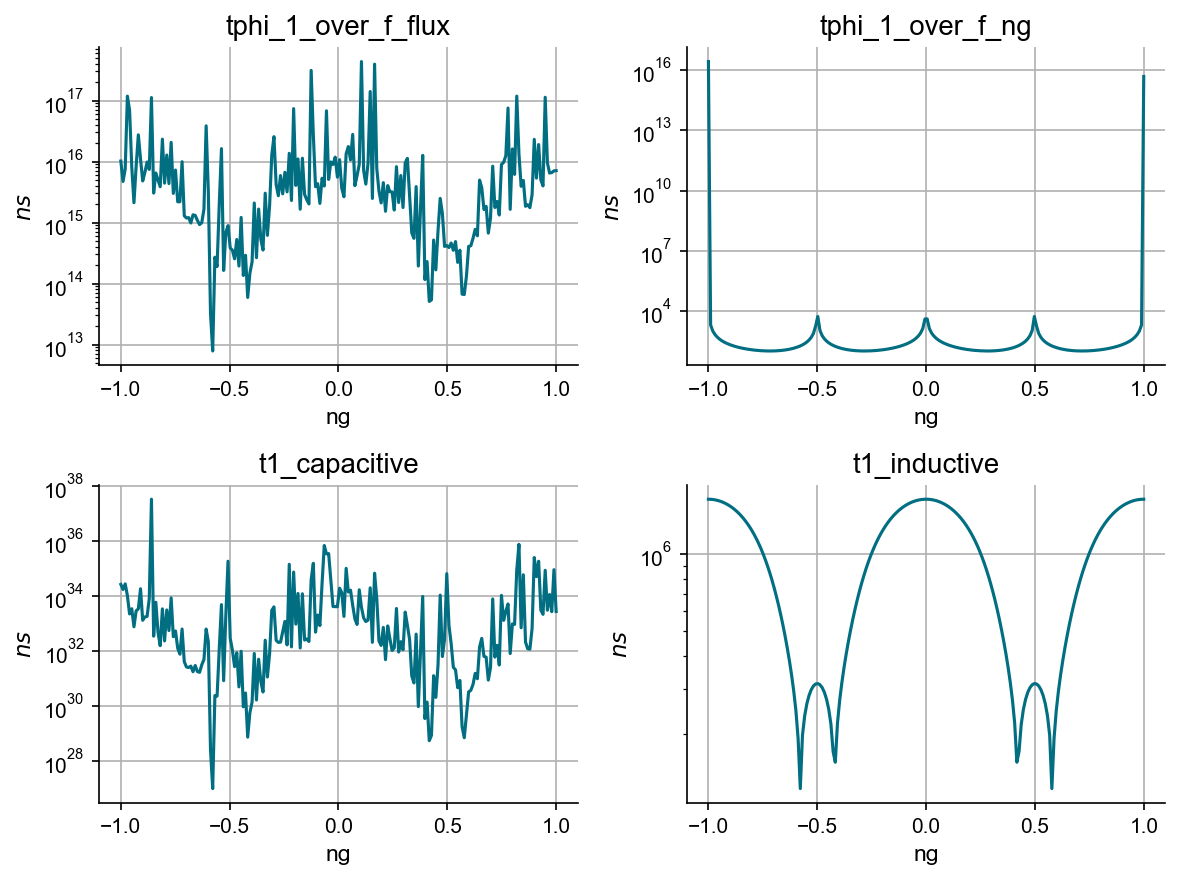

In [24]:
ng_list = np.linspace(-1,1,200)
bifluxon.flux=0.0
fig,ax = bifluxon.plot_coherence_vs_paramvals('ng', ng_list)

## vs n_g at $\Phi = 0.25$

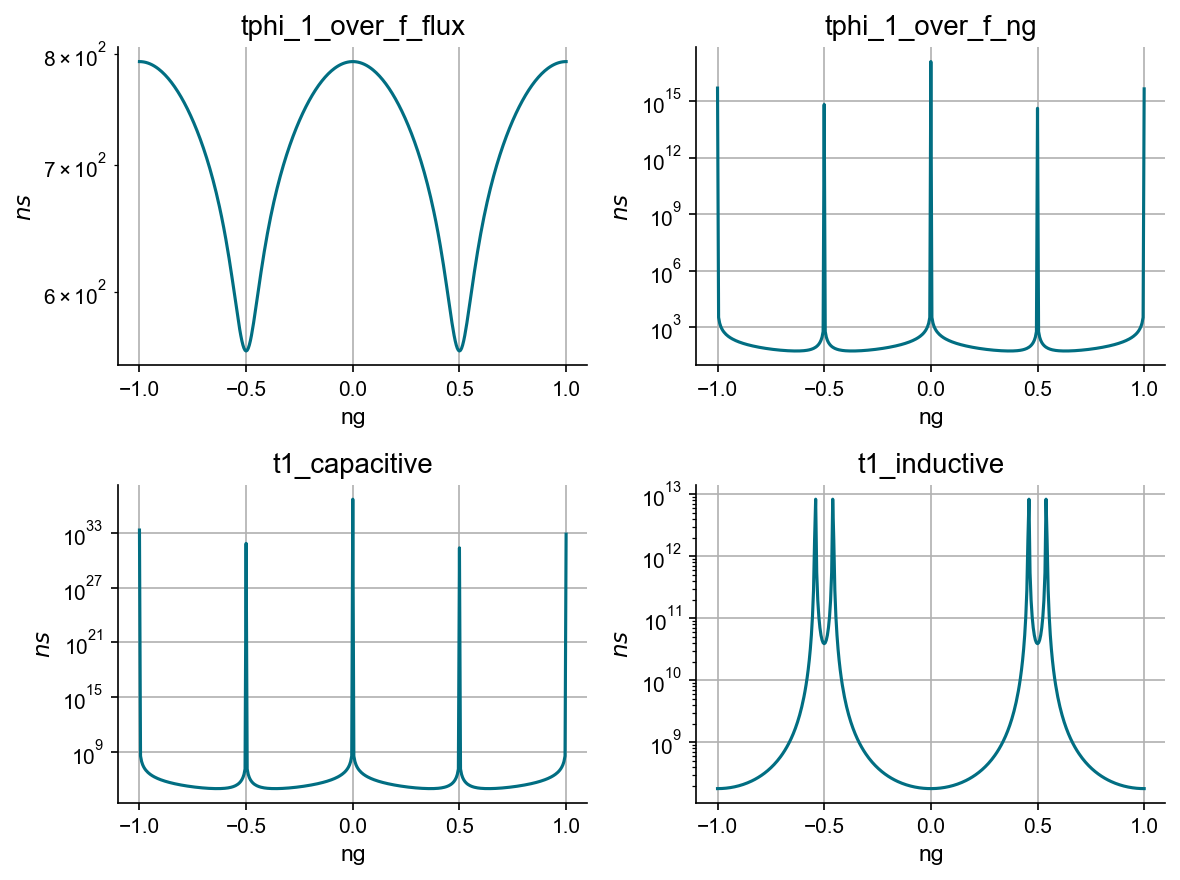

In [26]:
ng_list = np.linspace(-1,1,401)
bifluxon.flux=0.25
fig,ax = bifluxon.plot_coherence_vs_paramvals('ng', ng_list)

In [ ]:
ng_list = np.linspace(-1,1,200)
bifluxon.flux=0.25
fig,ax = bifluxon.plot_coherence_vs_paramvals('ng', ng_list)

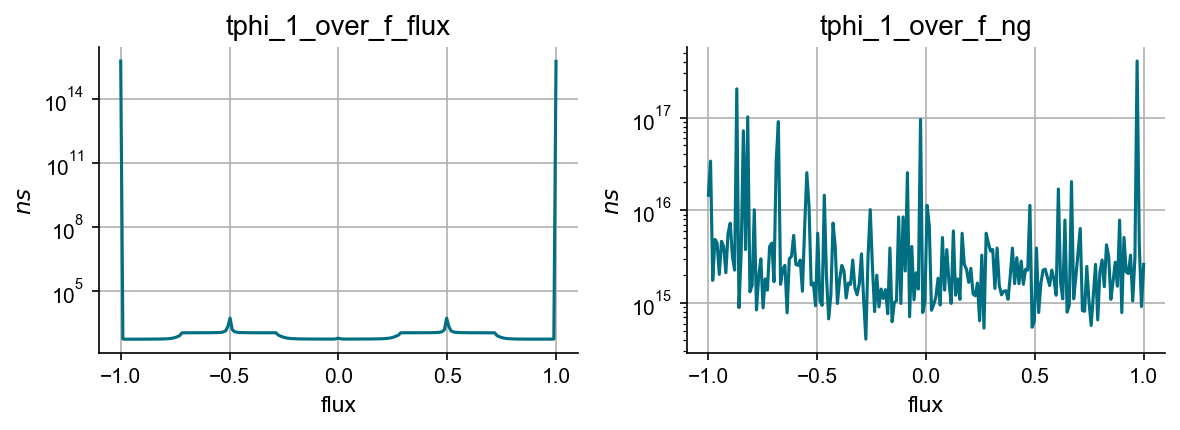

In [11]:
flux_list = np.linspace(-1,1,200)
bifluxon.ng=0.5
fig,ax = bifluxon.plot_coherence_vs_paramvals('flux', flux_list)

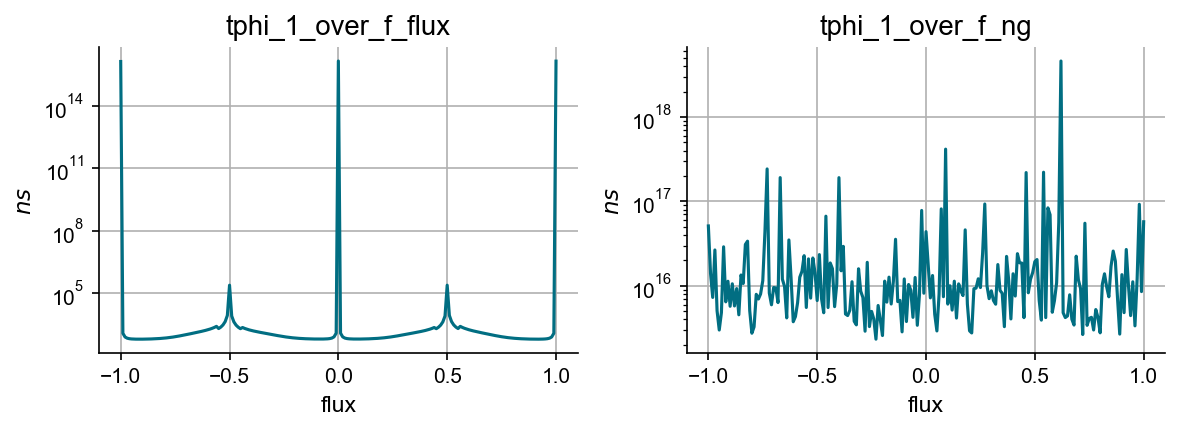

In [12]:
flux_list = np.linspace(-1,1,201)
bifluxon.ng=0.0
fig,ax = bifluxon.plot_coherence_vs_paramvals('flux', flux_list)

Bifluxon------------|
                    | EJ: 27.2
                    | EL: 0.94
                    | EC: 7.7
                    | ECL: 10.0
                    | dEJ: 0.11029411764705882
                    | ng: 0.5
                    | flux: 0.5
                    | ncut: 30
                    | truncated_dim: 6
                    |
                    | dim: 12200



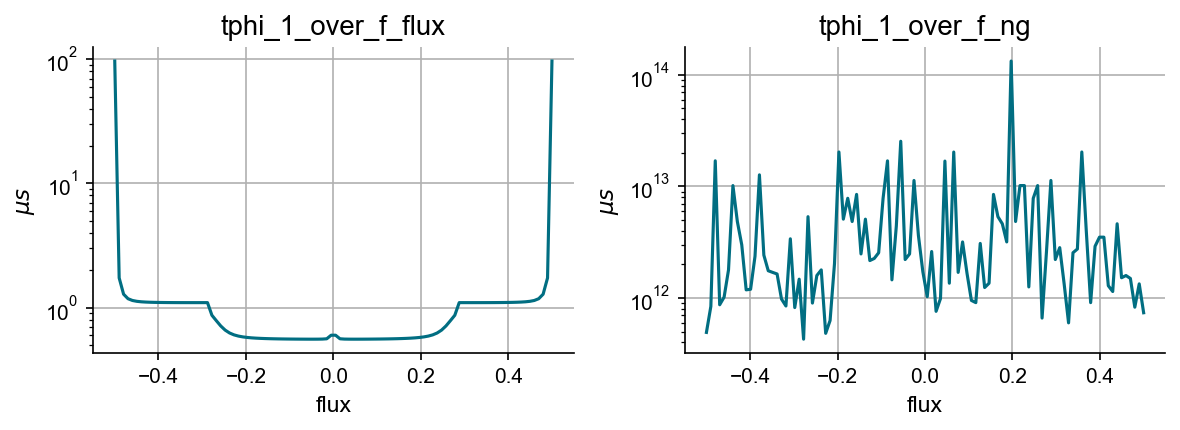

In [20]:
bifluxon.ng = 0.5
print(bifluxon)

bifluxon.plot_coherence_vs_paramvals(
                     param_name='flux',
                     param_vals=np.linspace(-0.5, 0.5, 100),
                     noise_channels = ['tphi_1_over_f_flux',
                                      'tphi_1_over_f_ng'],
                     common_noise_options= dict(i=0, j=1),
                     scale=1e-3,
                     ylabel=r"$\mu s$",
                     ylim=(None, None)
                    );

Bifluxon------------|
                    | EJ: 27.2
                    | EL: 0.94
                    | EC: 7.7
                    | ECL: 10.0
                    | dEJ: 0.11029411764705882
                    | ng: 0.0
                    | flux: 0.5
                    | ncut: 30
                    | truncated_dim: 6
                    |
                    | dim: 12200



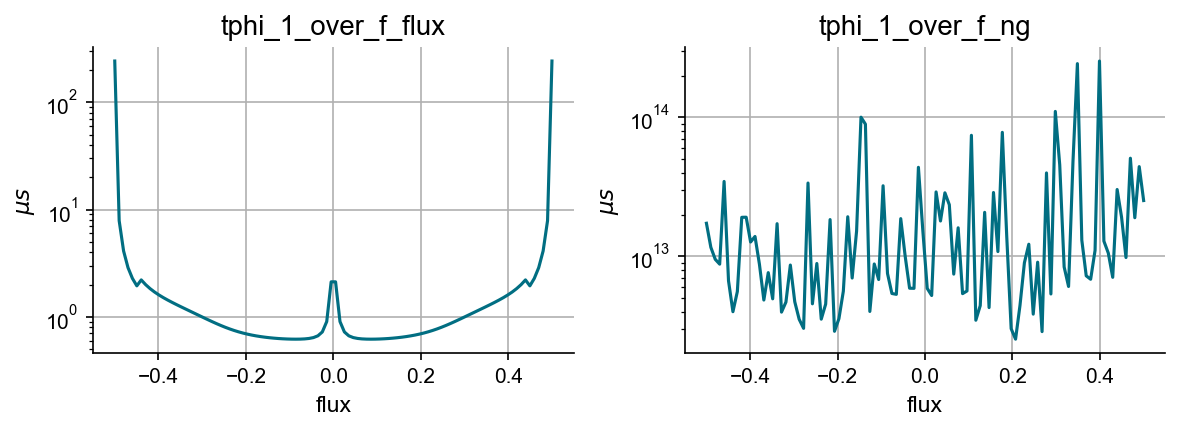

In [19]:
bifluxon.ng = 0.0
print(bifluxon)

bifluxon.plot_coherence_vs_paramvals(
                     param_name='flux',
                     param_vals=np.linspace(-0.5, 0.5, 100),
                     noise_channels = ['tphi_1_over_f_flux',
                                      'tphi_1_over_f_ng'],
                     common_noise_options= dict(i=0, j=1),
                     scale=1e-3,
                     ylabel=r"$\mu s$",
                     ylim=(None, None)
                    );

# Hard bifluxon

In [51]:
bifluxon = scq.Bifluxon(grid = phi_grid,
                           EJ   = 10.0,
                           EL   =  0.05,
                           ECL  = 20.0,
                           EC   = 0.3
                        ,
                           dEJ = 0.0,
                           ng   = 0.5,
                           flux = 0.5,
                           ncut = 30)

fs= bifluxon.eigenvals(evals_count=12)

# Spectrum vs gate charge at 0 flux

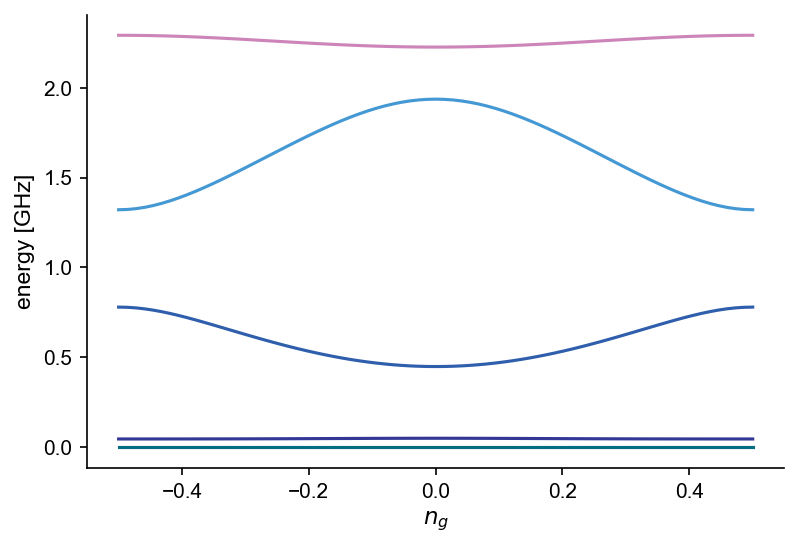

In [52]:
ng_list = np.linspace(-0.5, 0.5, 75)
bifluxon.flux = 0.0
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=True);

## at half flux

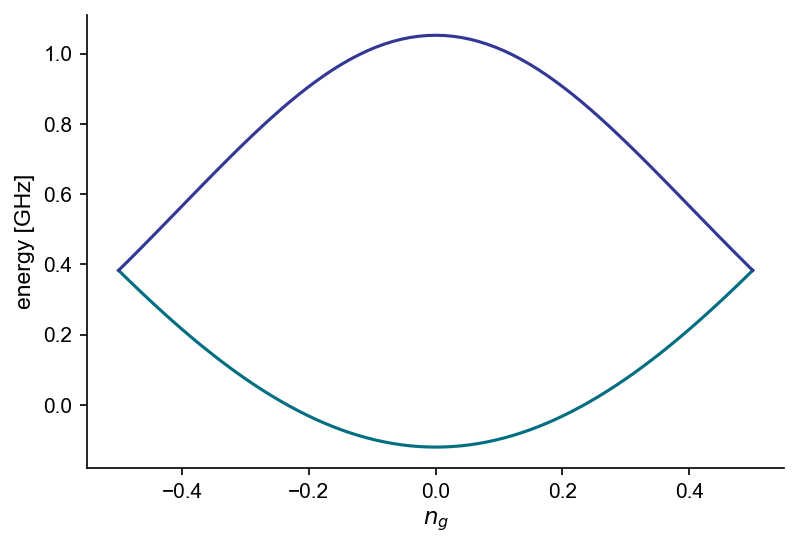

In [53]:
ng_list = np.linspace(-0.5, 0.5, 75)
bifluxon.flux = 0.5
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=2, subtract_ground=False);

In [ ]:
ng_list = np.linspace(-0.5, 0.5, 75)
bifluxon.flux = 0.5
bifluxon.plot_evals_vs_paramvals('ng', ng_list, evals_count=3, subtract_ground=True);

In [ ]:
## vs flux at half charge

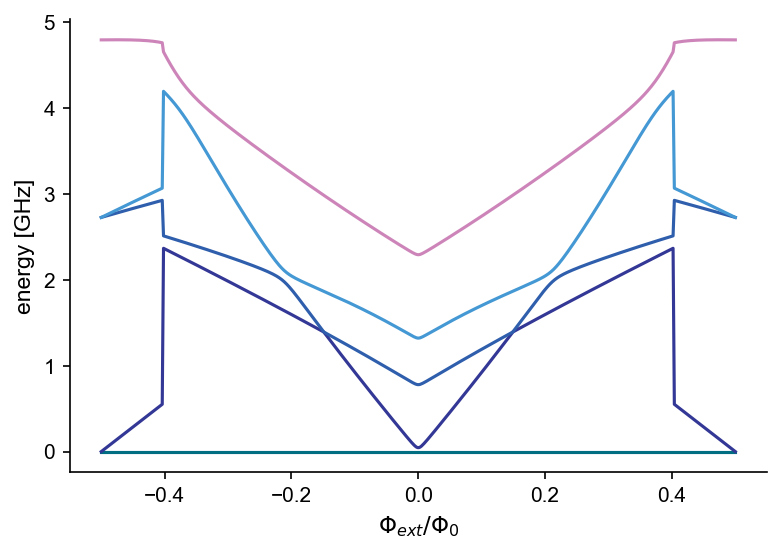

In [49]:
flux_list = np.linspace(-0.5, 0.5, 500)
bifluxon.ng = 0.5
bifluxon.dEJ = 0.0
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground= True);


## vs flux at ng = 0

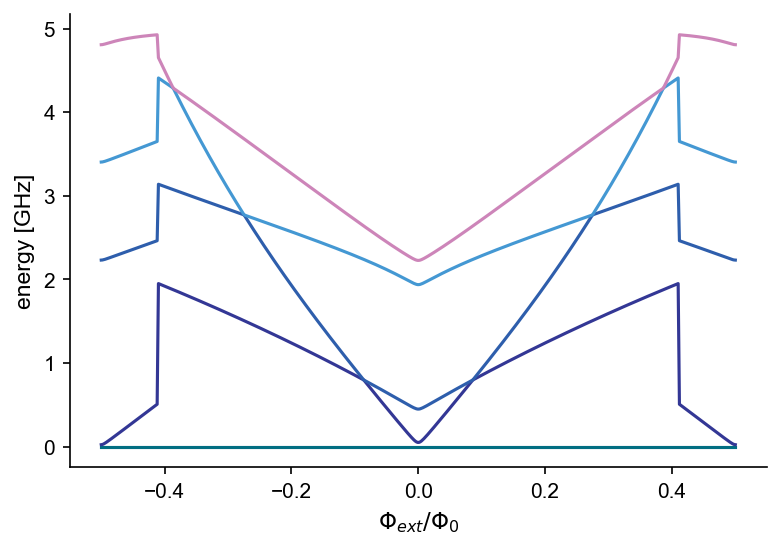

In [50]:
flux_list = np.linspace(-0.5, 0.5, 500)
bifluxon.ng = 0.0
bifluxon.dEJ = 0.0
fig,ax = bifluxon.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True);